# Classification Using K-Nearest Neighbor Algorithm

# Practice

In [1]:
# importing required liberary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Task 1

## Loading Wine Dataset

In [2]:
from sklearn.datasets import load_wine
df=load_wine() # reading dataset
df

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
df=pd.DataFrame(data=np.c_[df['data'],df['target']],columns=df['feature_names']+['target'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


##  Data Exploration

In [4]:
# shape of the dataset
print('The number of samples in data is {}.'.format(df.shape[0]))
print('The number of columns in data is {}.'.format(df.shape[1]))

The number of samples in data is 178.
The number of columns in data is 14.


In [5]:
# exploring the existing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
# exploring the numeric data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [7]:
# exploring the existing data types
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [8]:
# checking missing values in data
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

<AxesSubplot:>

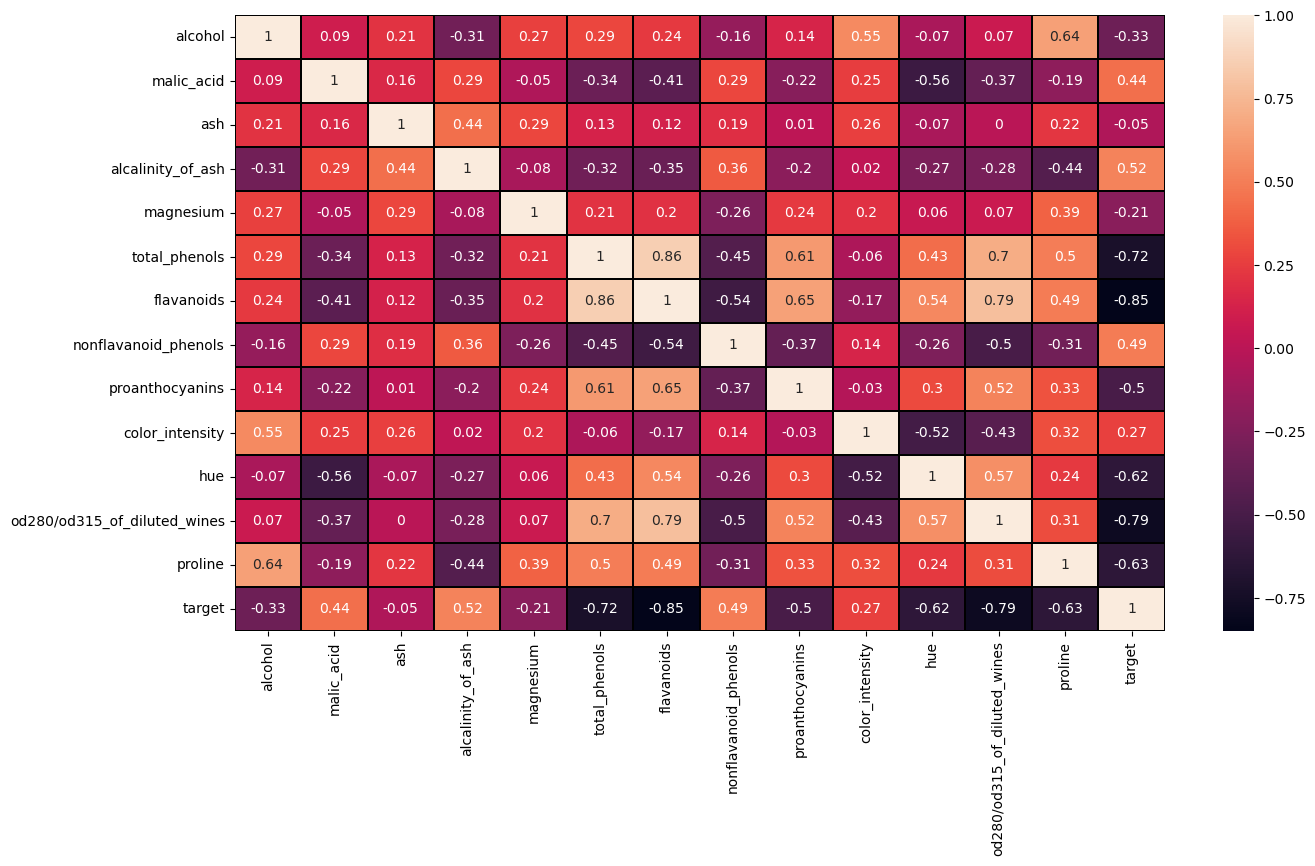

In [9]:
plt.figure(figsize=(15,8))
sb.heatmap(round(df.corr(),2),annot=True,linewidths=0.3,linecolor='black')

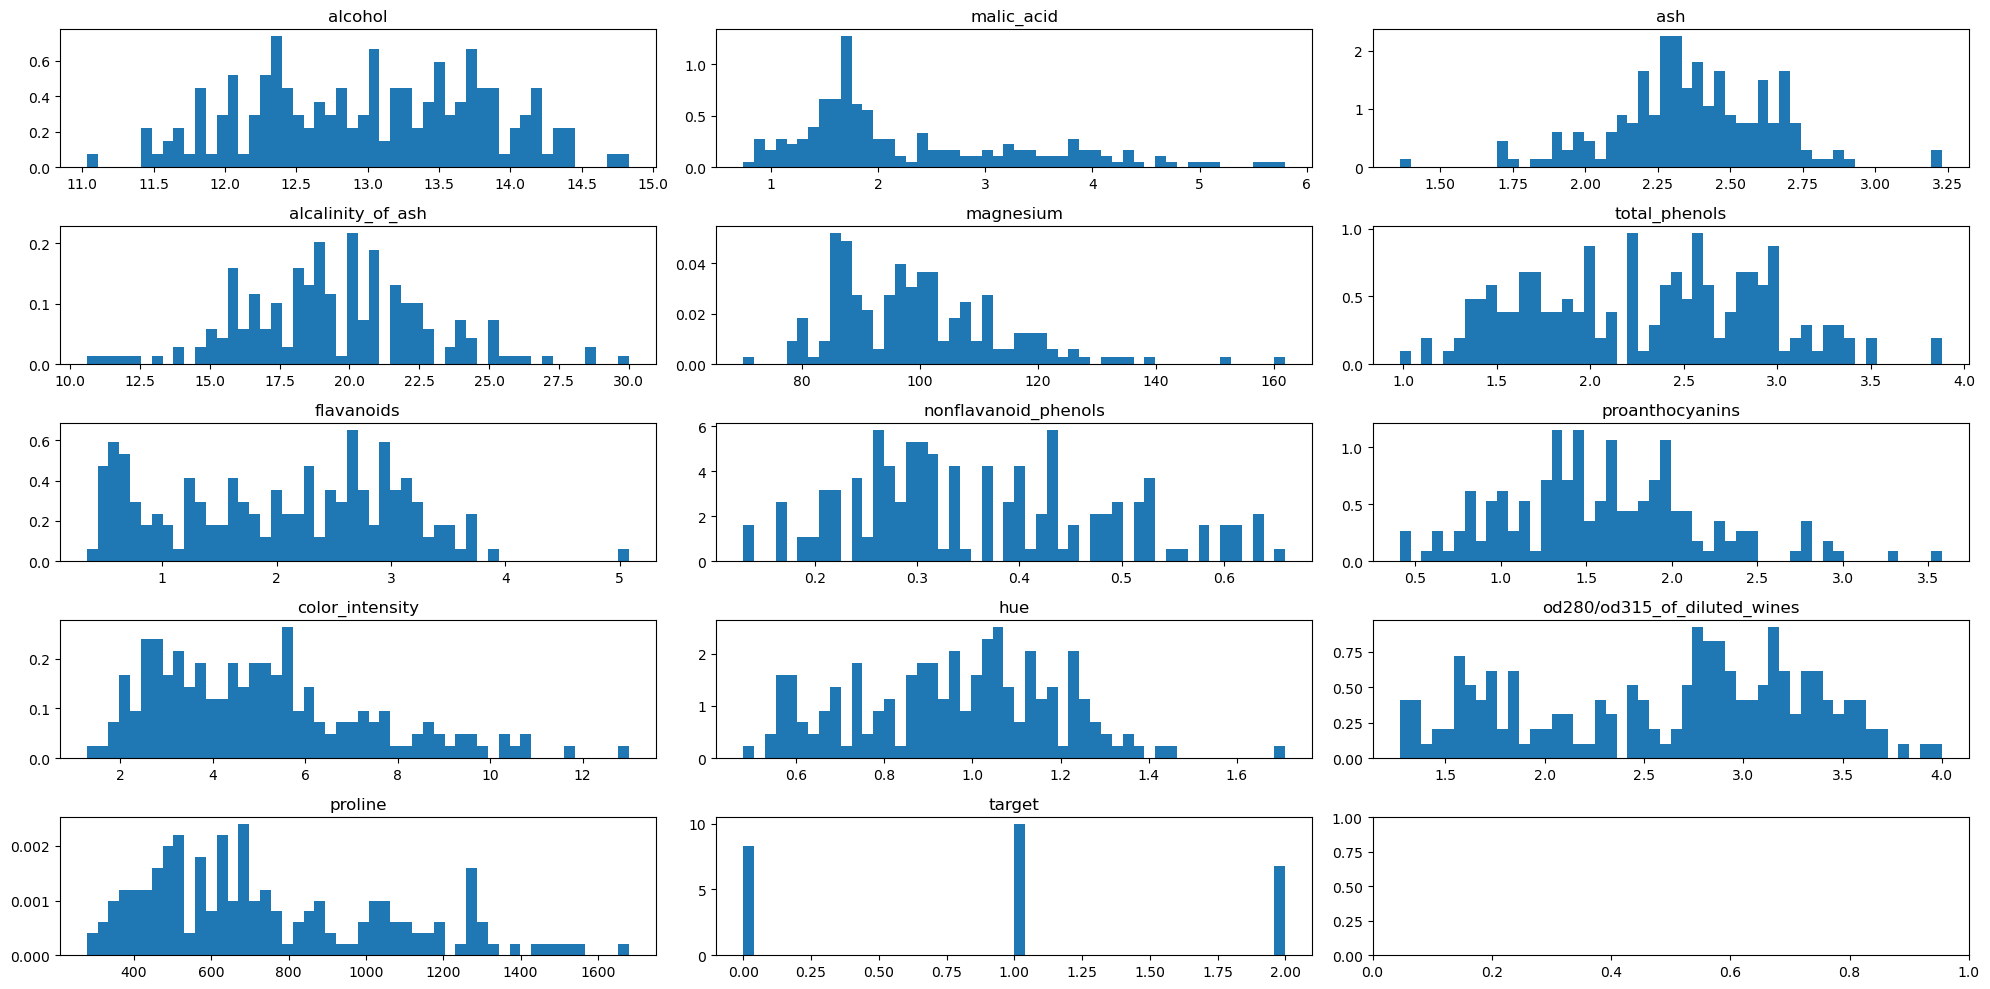

In [10]:
#Creating Histogram for each input
numeric=['int16','int32','int64','float16','float32','float64']
data=df.select_dtypes(include=numeric)
numeric_col=data.columns
num_cols=3
n_bins=50

num_rows=int(len(numeric_col)/num_cols)+1

fig,axs=plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,10))

for col,ax in zip(numeric_col,axs.flatten()[:len(numeric_col)]):
    ax.hist(data[col],bins=n_bins,density=True)
    ax.set_title(col)
plt.show()

### alcohol,ash,alcalinity_of_ash,nonflavanoid_phenols,od280/od315_of_diluted_wines,proline are normally distributed

In [11]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

## Data Preprocessing

In [12]:
#Scaling the dataset

x=df.drop(columns='target',axis=1)
y=df['target']
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [13]:
#Creating test and training datasets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=47)
print('Size of training dataset: ', x_train.shape)
print('Size of test dataset: ', x_test.shape)

Size of training dataset:  (142, 13)
Size of test dataset:  (36, 13)


# Task 2 

## Model Building and Model Training

In [14]:
from sklearn.neighbors import KNeighborsClassifier
k=3
#Model Building
KNN=KNeighborsClassifier(k)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
#Using the trained model to predict the outcome of the X_Test dataset
y_pred=KNN.predict(x_test)

In [16]:
#Calculating the accuracy of the training dataset
acc_train = round(KNN.score(x_train, y_train) * 100, 2)
acc_train

97.18

In [17]:
#Calculating the accuracy of the training dataset
acc_train = round(KNN.score(x_test, y_test) * 100, 2)
acc_train

97.22

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
#Classification Report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       0.91      1.00      0.95        10
         2.0       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [19]:
#Estimating Performance
print(accuracy_score(y_pred,y_test))

0.9722222222222222


# Task 3

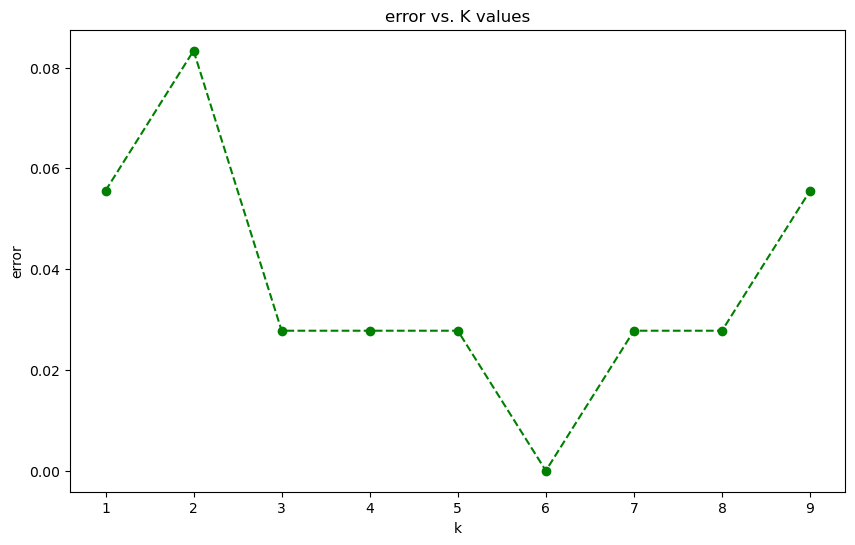

In [20]:
err=[]
for k in range(1,10):
    KNN=KNeighborsClassifier(k)
    KNN.fit(x_train,y_train)
    pred=KNN.predict(x_test)
    err.append(np.mean(pred!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,10),err,color='g',linestyle='dashed',marker='o')
plt.xlabel('k')
plt.ylabel('error')
plt.title('error vs. K values')
plt.show()

### For k=6 error is minimum hence accuracy is higher

In [21]:
err #wrong prediction

[0.05555555555555555,
 0.08333333333333333,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.0,
 0.027777777777777776,
 0.027777777777777776,
 0.05555555555555555]